In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix, ConfusionMatrixDisplay
import pickle
import seaborn as sns


In [2]:
# Load movies review data

df = pd.read_csv("IMDB Dataset.csv")

In [3]:
# Display top 5 rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Get the shape of the data
df.shape

(50000, 2)

In [5]:
# Display different types of reviews
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [6]:
# Display number of positive and negative reviews
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
# Assign a numeric value to the sentiment column
le = LabelEncoder()
m = le.fit_transform(df['sentiment'])

In [8]:
# Display the encoding results
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
# Set the reviews as the independent data and the sentiment as the dependent data
independent = df['review']
dependent = df['sentiment']

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shannon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Remove all special characters from data and remove stopwards and apply stemming
ps = PorterStemmer()
corpus = []

X = df['review']

for i in range(len(X)):
    if i%10 == 1: print(i)
    review = re.sub("[^a-zA-Z]"," ", X[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
501
511
521
531
541
551
561
571
581
591
601
611
621
631
641
651
661
671
681
691
701
711
721
731
741
751
761
771
781
791
801
811
821
831
841
851
861
871
881
891
901
911
921
931
941
951
961
971
981
991
1001
1011
1021
1031
1041
1051
1061
1071
1081
1091
1101
1111
1121
1131
1141
1151
1161
1171
1181
1191
1201
1211
1221
1231
1241
1251
1261
1271
1281
1291
1301
1311
1321
1331
1341
1351
1361
1371
1381
1391
1401
1411
1421
1431
1441
1451
1461
1471
1481
1491
1501
1511
1521
1531
1541
1551
1561
1571
1581
1591
1601
1611
1621
1631
1641
1651
1661
1671
1681
1691
1701
1711
1721
1731
1741
1751
1761
1771
1781
1791
1801
1811
1821
1831
1841
1851
1861
1871
1881
1891
1901
1911
1921
1931
1941
1951
1961
1971
1981
1991
2001
2011
2021
2031
2041
2051
2061
2071
2081
2091
2101
2111
2121
2131
2141
2151
2161
2171
2181
2191
2201
2211
2

15511
15521
15531
15541
15551
15561
15571
15581
15591
15601
15611
15621
15631
15641
15651
15661
15671
15681
15691
15701
15711
15721
15731
15741
15751
15761
15771
15781
15791
15801
15811
15821
15831
15841
15851
15861
15871
15881
15891
15901
15911
15921
15931
15941
15951
15961
15971
15981
15991
16001
16011
16021
16031
16041
16051
16061
16071
16081
16091
16101
16111
16121
16131
16141
16151
16161
16171
16181
16191
16201
16211
16221
16231
16241
16251
16261
16271
16281
16291
16301
16311
16321
16331
16341
16351
16361
16371
16381
16391
16401
16411
16421
16431
16441
16451
16461
16471
16481
16491
16501
16511
16521
16531
16541
16551
16561
16571
16581
16591
16601
16611
16621
16631
16641
16651
16661
16671
16681
16691
16701
16711
16721
16731
16741
16751
16761
16771
16781
16791
16801
16811
16821
16831
16841
16851
16861
16871
16881
16891
16901
16911
16921
16931
16941
16951
16961
16971
16981
16991
17001
17011
17021
17031
17041
17051
17061
17071
17081
17091
17101
17111
17121
17131
17141
17151
17161
1717

29171
29181
29191
29201
29211
29221
29231
29241
29251
29261
29271
29281
29291
29301
29311
29321
29331
29341
29351
29361
29371
29381
29391
29401
29411
29421
29431
29441
29451
29461
29471
29481
29491
29501
29511
29521
29531
29541
29551
29561
29571
29581
29591
29601
29611
29621
29631
29641
29651
29661
29671
29681
29691
29701
29711
29721
29731
29741
29751
29761
29771
29781
29791
29801
29811
29821
29831
29841
29851
29861
29871
29881
29891
29901
29911
29921
29931
29941
29951
29961
29971
29981
29991
30001
30011
30021
30031
30041
30051
30061
30071
30081
30091
30101
30111
30121
30131
30141
30151
30161
30171
30181
30191
30201
30211
30221
30231
30241
30251
30261
30271
30281
30291
30301
30311
30321
30331
30341
30351
30361
30371
30381
30391
30401
30411
30421
30431
30441
30451
30461
30471
30481
30491
30501
30511
30521
30531
30541
30551
30561
30571
30581
30591
30601
30611
30621
30631
30641
30651
30661
30671
30681
30691
30701
30711
30721
30731
30741
30751
30761
30771
30781
30791
30801
30811
30821
3083

42831
42841
42851
42861
42871
42881
42891
42901
42911
42921
42931
42941
42951
42961
42971
42981
42991
43001
43011
43021
43031
43041
43051
43061
43071
43081
43091
43101
43111
43121
43131
43141
43151
43161
43171
43181
43191
43201
43211
43221
43231
43241
43251
43261
43271
43281
43291
43301
43311
43321
43331
43341
43351
43361
43371
43381
43391
43401
43411
43421
43431
43441
43451
43461
43471
43481
43491
43501
43511
43521
43531
43541
43551
43561
43571
43581
43591
43601
43611
43621
43631
43641
43651
43661
43671
43681
43691
43701
43711
43721
43731
43741
43751
43761
43771
43781
43791
43801
43811
43821
43831
43841
43851
43861
43871
43881
43891
43901
43911
43921
43931
43941
43951
43961
43971
43981
43991
44001
44011
44021
44031
44041
44051
44061
44071
44081
44091
44101
44111
44121
44131
44141
44151
44161
44171
44181
44191
44201
44211
44221
44231
44241
44251
44261
44271
44281
44291
44301
44311
44321
44331
44341
44351
44361
44371
44381
44391
44401
44411
44421
44431
44441
44451
44461
44471
44481
4449

In [3]:
#Display stemmed data
corpus

NameError: name 'corpus' is not defined

In [2]:
#Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

NameError: name 'corpus' is not defined

In [ ]:
# Get the shape of the data
X.shape

In [15]:
#Split data into train and test set
y = df['sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [16]:
# Get the shape of the data
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((25000, 5000), (25000, 5000), (25000,), (25000,))

In [17]:
#Define naive-bayes model
mnb = MultinomialNB()
mnb.fit(X, y)

MultinomialNB()

In [18]:
#Attempt to predict the data using the model
pred = mnb.predict(X_test)

In [19]:
# Check how accurate the prediction was
print("Accuracy: ", accuracy_score(Y_test , pred))
print("Loss: ", 1 - accuracy_score(Y_test, pred))

print(classification_report(Y_test , pred))

Accuracy:  0.85908
Loss:  0.14092000000000005
              precision    recall  f1-score   support

    negative       0.86      0.85      0.86     12483
    positive       0.86      0.86      0.86     12517

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [20]:
# Display the difference between the actual and predicted data
df1 = pd.DataFrame(pred)
df2 = pd.DataFrame(df.head(25000))
df2['predicted'] = df1
df2['Accurate'] = np.where(df2['predicted'] == df2['sentiment'], 'True', 'False')
pd.DataFrame(df2)

,review,sentiment,predicted,Accurate
0,One of the other reviewers has mentioned that ...,positive,positive,True
1,A wonderful little production. <br /><br />The...,positive,positive,True
2,I thought this was a wonderful way to spend ti...,positive,negative,False
3,Basically there's a family where a little boy ...,negative,positive,False
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,negative,False
...,...,...,...,...
24995,This movie was a real torture fest to sit thro...,negative,positive,False
24996,John Wayne & Albert Dekker compete for oil rig...,negative,positive,False
24997,Tarantino once remarked on a melodrama from th...,positive,positive,True
24998,Aah yes the workout show was a great. Not only...,positive,negative,False


In [21]:
# Save the model and TFidfVectorizer
mnb_file = open('mnb.dat', 'wb')
cv_file = open('cv.dat', 'wb')
pickle.dump(mnb, mnb_file)
pickle.dump(cv, cv_file)  # 1: pos , 0:Neg

mnb_file.close()
cv_file.close()

In [22]:
# Load the model and vectorizer fresh
load_cv_file = open('cv.dat', 'rb')
load_mnb_file = open('mnb.dat', 'rb')

save_cv = pickle.load(load_cv_file)
model = pickle.load(load_mnb_file)

load_cv_file.close()
load_mnb_file.close()

In [23]:
# Test model using a review
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 'positive':
        return 'Positive review'
    else:
        return 'Negative review'

In [24]:
# Test the first review and check that the model predicts correctly
sen = "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."
res = test_model(sen)
print(res)

Positive review


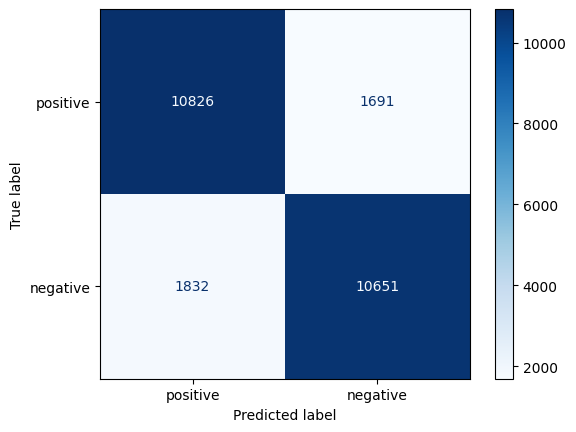

In [25]:
#Plots a confusion matrix to display accuracy of model
cm = confusion_matrix(Y_test, pred, labels=df['sentiment'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['sentiment'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()